In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('new_normalized_data.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
df = df.loc[df.average_std < 1.5]

In [4]:
testing = df.loc[df.word.isin(['worst','love', 'diseases', 'ultimate'])]
testing = testing.reset_index(drop=True)

In [5]:
def write_normialized_statistics(series, df):
    mean_total = 0
    median_total = 0
    mode_total = 0
    mode = 0
    counter = 0
    stop_median = 0
    for x in series:
        if counter > 0:
            mean_total += counter*x
            median_total += x
            if (median_total >= 50 and stop_median == 0):
                df.loc[(df.word == series.name) & (df.type == 1), 'median'] = counter
                stop_median = 1
            if x > mode_total:
                mode_total = x
                mode = counter
        counter += 1
    df.loc[(df.word == series.name) & (df.type == 1), 'mean'] = mean_total/100
    df.loc[(df.word == series.name) & (df.type == 1), 'mode'] = mode

In [6]:
%%time
testing.groupby(testing.word).normilized_percent.apply(write_normialized_statistics, df=testing)

CPU times: user 63.4 ms, sys: 4.52 ms, total: 67.9 ms
Wall time: 77.9 ms


word
diseases    None
love        None
ultimate    None
worst       None
Name: normilized_percent, dtype: object

In [7]:
%%time
df.groupby(df.word).normilized_percent.apply(write_normialized_statistics, df=df)

CPU times: user 46.7 s, sys: 465 ms, total: 47.2 s
Wall time: 47.5 s


word
'nuff                    None
'take                    None
'the                     None
----                     None
-1                       None
-limited                 None
0                        None
01                       None
05                       None
09                       None
1-4                      None
1-5                      None
1-6                      None
1-8                      None
10                       None
10-15                    None
1010                     None
10th                     None
11                       None
110                      None
15-20                    None
150                      None
16                       None
18                       None
18xx                     None
1910                     None
1960                     None
1995                     None
1999                     None
1v1                      None
                         ... 
workerplacement          None
worlds                   None
worn 

In [8]:
df.to_csv('new_normalized_data.csv')

In [9]:
df['zeros'] = 0
df['total_word_count'] = 0
testing['zeros'] = 0
testing['total_word_count'] = 0

In [10]:
def values_with_zeros_and_total_word_count(series, df):
    counter = 0
    number_of_zeros = 0
    total_words = 0
    for x in series:
        if (counter > 0):
            if (x < 2):
                number_of_zeros += 1
            total_words += x
        counter +=1
    df.loc[(df.word == series.name) & (df.type == 1), 'zeros'] = number_of_zeros
    df.loc[(df.word == series.name) & (df.type == 1), 'total_word_count'] = total_words

In [11]:
%%time
df.groupby(df.word).word_count.apply(values_with_zeros_and_total_word_count, df=df)

CPU times: user 30.7 s, sys: 285 ms, total: 31 s
Wall time: 31.4 s


word
'nuff                    None
'take                    None
'the                     None
----                     None
-1                       None
-limited                 None
0                        None
01                       None
05                       None
09                       None
1-4                      None
1-5                      None
1-6                      None
1-8                      None
10                       None
10-15                    None
1010                     None
10th                     None
11                       None
110                      None
15-20                    None
150                      None
16                       None
18                       None
18xx                     None
1910                     None
1960                     None
1995                     None
1999                     None
1v1                      None
                         ... 
workerplacement          None
worlds                   None
worn 

In [12]:
words = df.loc[df.type == 1]

In [13]:
words.to_csv('words.csv')

In [14]:
df = pd.read_csv('words.csv')
df = df.drop(columns=['Unnamed: 0'])

In [15]:
df = df.sort_values(by=['average_std'])

In [16]:
cols = df.columns.tolist()

In [17]:
cols = ['word',
 'total_word_count',
 'zeros',
 'average_std',
 'mean',
 'median',
 'mode',
 'percent_average',
 'percent_std',
 'rating',
 'word_count',
 'divisor',
 'percent',
 'type',
 'normilization_divisor',
 'normilized_percent']

In [18]:
df = df[cols]

In [19]:
df = df.drop(columns=['rating', 'word_count', 'divisor', 'percent'])

In [20]:
df = df.drop(columns=['normilized_percent', 'type', 'normilization_divisor', 'percent_std'])

In [21]:
df['new'] = df.percent_average.apply(lambda x: x*100)

In [22]:
df = df.drop(columns=['percent_average'])

In [23]:
df['percent_average'] = df.new.apply(lambda x: x*100)

In [24]:
df = df.drop(columns=['new'])

In [25]:
df = df.sort_values(by=['percent_average'],ascending=False)

In [26]:
df.head()

,word,total_word_count,zeros,average_std,mean,median,mode,percent_average
1289,great,53725.0,0,1.290807,7.562748,8,9,758.046962
1288,love,22575.0,0,1.076059,7.806826,9,10,376.468269
1133,boring,5024.0,0,1.040698,2.866672,3,1,367.797693
1287,best,20618.0,0,1.006746,7.934620,9,10,347.978685
1135,ever,6227.0,0,1.233311,5.106415,4,1,218.481853


In [27]:
df.loc[df.zeros >= 7]

,word,total_word_count,zeros,average_std,mean,median,mode,percent_average
1450,smjj,89.0,9,0.333333,1.0,1,1,40.881948


In [28]:
df = df.drop(1450)

In [29]:
df.loc[df.zeros >= 7]

,word,total_word_count,zeros,average_std,mean,median,mode,percent_average


In [30]:
len(df)

2087

In [31]:
len(df.groupby(df.average_std))

2087

In [32]:
df = df.reset_index(drop=True)

In [33]:
df = df.reset_index()

In [34]:
word_list = dict()

In [35]:
def turn(word, index):
    word_list[word] = [index]

In [36]:
df.apply(lambda row: turn(row['word'], row['index']), axis=1)

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
2057    None
2058    None
2059    None
2060    None
2061    None
2062    None
2063    None
2064    None
2065    None
2066    None
2067    None
2068    None
2069    None
2070    None
2071    None
2072    None
2073    None
2074    None
2075    None
2076    None
2077    None
2078    None
2079    None
2080    None
2081    None
2082    None
2083    None
2084    None
2085    None
2086    None
Length: 2087, dtype: object

In [37]:
word_list['great']

[0]

In [38]:
test = pd.read_csv('../data/small_sample.csv')
test.drop(columns=['Unnamed: 0'], inplace=True)

In [39]:
def remove_punctuation(comment):
    table = str.maketrans(dict.fromkeys('@#$%^&*()_+=~`[{}]|\:;"<,>."/'))
    return comment.translate(table)

In [40]:
def replace_exclimation(comment):
    return comment.replace('!', ' <!> ').replace('?', ' <?> ')

In [41]:
%%time
test['remove_punctuation'] = test.comment.apply(lambda x: remove_punctuation(x))
test.drop(columns=['comment'], inplace=True)
test.rename(columns={'remove_punctuation':'comment'}, inplace=True)
test['replace_punctuation'] = test.comment.apply(lambda x: replace_exclimation(x))
test.drop(columns=['comment'], inplace=True)
test.rename(columns={'replace_punctuation':'comment'}, inplace=True)

CPU times: user 30.5 ms, sys: 2.47 ms, total: 33 ms
Wall time: 31.5 ms


In [42]:
test.rating = np.ceil(test.rating)

In [43]:
def make_it_lower(comment):
    new_comment = []
    for x in comment.split(' '):
        new_comment.append(x.lower())
    return ' '.join(new_comment)

In [44]:
%%time
test['lower_comment'] = test.comment.apply(lambda x: make_it_lower(x))
test.drop(columns=['comment'], inplace=True)
test.rename(columns={'lower_comment':'comment'}, inplace=True)

CPU times: user 28 ms, sys: 2.46 ms, total: 30.4 ms
Wall time: 29.4 ms


In [45]:
def return_array(comment):
    new_comment = []
    for x in comment.split(' '):
        if x in word_list:
            new_comment.append(word_list[x][0])
    return new_comment

In [46]:
%%time
test['new'] = test.comment.apply(lambda x: return_array(x))

CPU times: user 19.6 ms, sys: 2.11 ms, total: 21.7 ms
Wall time: 21.3 ms


In [47]:
df.head()

,index,word,total_word_count,zeros,average_std,mean,median,mode,percent_average
0,0,great,53725.0,0,1.290807,7.562748,8,9,758.046962
1,1,love,22575.0,0,1.076059,7.806826,9,10,376.468269
2,2,boring,5024.0,0,1.040698,2.866672,3,1,367.797693
3,3,best,20618.0,0,1.006746,7.934620,9,10,347.978685
4,4,ever,6227.0,0,1.233311,5.106415,4,1,218.481853


In [48]:
word_values = dict()

In [49]:
def values(average, index):
    word_values[index] = [average]

In [50]:
df.apply(lambda row: values(row['mode'], row['index']), axis=1)

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
2057    None
2058    None
2059    None
2060    None
2061    None
2062    None
2063    None
2064    None
2065    None
2066    None
2067    None
2068    None
2069    None
2070    None
2071    None
2072    None
2073    None
2074    None
2075    None
2076    None
2077    None
2078    None
2079    None
2080    None
2081    None
2082    None
2083    None
2084    None
2085    None
2086    None
Length: 2087, dtype: object

In [75]:
def create_score(new):
    if new != []:
        raw_prediction = 0
        counter = 0
        for x in new:
#             print(word_values[x])
            raw_prediction += word_values[x][0]
            counter += 1
        return raw_prediction/counter
    else:
        return 7

In [52]:
test['prediction'] = test.new.apply(create_score)


In [53]:
test.dropna(inplace=True)

In [54]:
test.head(30)

,commenter,gameID,rating,comment,new,prediction
0,25308,37111,9.0,thematic bluff - many randomness i really ...,"[913, 3, 672, 1072]",5.500000
1,54313,12,8.0,well that ugly artwork certainly helped immers...,"[106, 1450]",1.000000
2,38165,50,8.0,love this game <!> if only the gf would play...,"[1, 652]",9.500000
3,56936,1198,5.0,set is a good game in small doses in my case v...,"[886, 886, 390, 244, 9, 14]",6.166667
4,47675,164153,6.0,so much better than descent better theme impro...,"[549, 1703, 4, 5]",6.000000
5,94529,31260,8.0,very tense and fun and i love pondering my str...,"[65, 1]",9.500000
9,171066,13291,7.0,same rating as base game new characters are go...,"[124, 239]",9.000000
10,96948,31260,8.0,great game but not sure yet how much i like it...,"[0, 1297]",5.000000
11,70621,12493,10.0,great game and very epic with lots of drama an...,"[0, 96, 0]",9.333333
13,22801,91536,9.0,looking forward to this one i hope it'll be go...,"[78, 836, 268]",6.666667


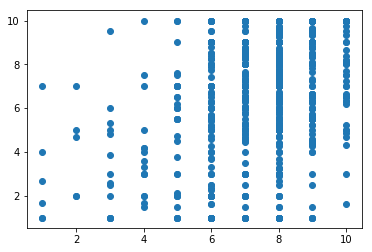

In [55]:
plt.scatter(test.rating, test.prediction)

In [56]:
def first_part_to_rmse(rating, prediction):
    return (rating-prediction)**2

In [57]:
test['prediction'].head()

0    5.500000
1    1.000000
2    9.500000
3    6.166667
4    6.000000
Name: prediction, dtype: float64

In [58]:
test['rating-prediction_squared'] = test.apply(lambda x: first_part_to_rmse(x['rating'], x['prediction']), axis=1)

In [59]:
test['group'] = 1

In [60]:
test.loc[1].comment

'well that ugly artwork certainly helped immerse me in the egyptian theme cool auction too  ra <!>  <!>  <!> '

In [61]:
def return_rmse(series):
    total = 0
    counter = 0
    for x in series:
        total += x
        counter += 1
    return ((total/counter)**(1/2))

In [62]:
test.groupby('group')['rating-prediction_squared'].apply(return_rmse)

group
1    2.770572
Name: rating-prediction_squared, dtype: float64

In [63]:
matthews_test = pd.read_csv('boardgame-comments-english-test.csv')

In [68]:
matthews_test.head()

,Compiled from boardgamegeek.com by Matt Borthwick,gameID,comment
0,140134,205637,This game is the first game that totally left ...
1,184733,2163,I got into this game just as the first edition...
2,17204,15158,This expansion has some edges but I like it be...
3,79036,35677,Why bother with Le Havre if you can play Agric...
4,188085,155426,Fun enough to discover and tinker around with....


In [81]:
list(matthews_test)

['Compiled from boardgamegeek.com by Matt Borthwick',
 'gameID',
 'comment ',
 'prediction']

In [82]:
## return a string in lower case
def make_it_lower(comment):
    new_comment = []
    for x in comment.split(' '):
        new_comment.append(x.lower())
    return ' '.join(new_comment)

## remove punctuation
def remove_punctuation(comment):
    table = str.maketrans(dict.fromkeys('@#$%^&*()_+=~`[{}]|\:;"<,>."/'))
    return comment.translate(table)

## replace punctuation
def replace_exclimation(comment):
    return comment.replace('!', ' <!> ').replace('?', ' <?> ')

In [84]:
matthews_test.rename(columns={'comment ':'comment'}, inplace=True)
matthews_test['lower_comment'] = matthews_test.comment.apply(lambda x: make_it_lower(x))
matthews_test.drop(columns=['comment'], inplace=True)
matthews_test.rename(columns={'lower_comment':'comment'}, inplace=True)
matthews_test['remove_punctuation'] = matthews_test.comment.apply(lambda x: remove_punctuation(x))
matthews_test.drop(columns=['comment'], inplace=True)
matthews_test.rename(columns={'remove_punctuation':'comment'}, inplace=True)
matthews_test['replace_punctuation'] = matthews_test.comment.apply(lambda x: replace_exclimation(x))
matthews_test.drop(columns=['comment'], inplace=True)
matthews_test.rename(columns={'replace_punctuation':'comment'}, inplace=True)

In [85]:
matthews_test['new'] = matthews_test['comment'].apply(lambda x: return_array(x))

In [86]:
matthews_test

,Compiled from boardgamegeek.com by Matt Borthwick,gameID,prediction,comment,new
0,140134,205637,8.400000,this game is the first game that totally left ...,"[1603, 0, 21, 487, 0, 832, 752, 1231]"
1,184733,2163,5.000000,i got into this game just as the first edition...,"[873, 79]"
2,17204,15158,6.500000,this expansion has some edges but i like it be...,"[1898, 1966, 7, 627, 881, 1489]"
3,79036,35677,1.000000,why bother with le havre if you can play agric...,"[10, 166, 622, 829, 108, 622, 829]"
4,188085,155426,7.000000,fun enough to discover and tinker around with ...,[]
5,82907,147151,4.000000,at first i thought it's a nice idea but not so...,"[296, 1439, 357, 740, 24, 3, 3, 0, 547, 540, 2..."
6,12961,39856,10.000000,one of the best party games cards are fantasti...,"[3, 21]"
7,93054,93,7.000000,played 4142006,[]
8,125298,5,5.000000,it takes a while to wrap your head around the ...,"[207, 242]"
9,48901,13,9.500000,decent really overplayed this when a gf of min...,"[23, 652, 1231]"


In [87]:
matthews_test['prediction'] = matthews_test.new.apply(create_score)

In [88]:
matthews_test.drop(columns=['new'], inplace=True)

In [89]:
matthews_test.to_csv('matthews_test.csv')

## Overall RMSE 2.4175 Weighted RMSE 3.0175